# Household Power Consumption : Data Vizualisation Notebook

## Imports

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime
import os
from statsmodels.tsa.seasonal import seasonal_decompose
# from sklearn import datasets, svm, preprocessing
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolutpip install nodejse_error, classification_report
# from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

## Data loading

In [11]:
df = pd.read_csv(os.getcwd()+"/pre_processing/dataset_traite.csv", sep=',', parse_dates=["DateTime"],index_col=['DateTime'])

In [12]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [14]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091514e+00,1.237063e-01,2.408396e+02,4.627338e+00,1.121462e+00,1.298511e+00,6.459688e+00
std,1.051782e+00,1.120370e-01,3.223413e+00,4.421231e+00,6.115164e+00,5.786107e+00,8.393276e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.390100e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.160000e-01,1.020000e-01,2.410000e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.526000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


# Data Visualization

## Visualization of all our variables per day, month and year

##### mean value of all 7 variables per month

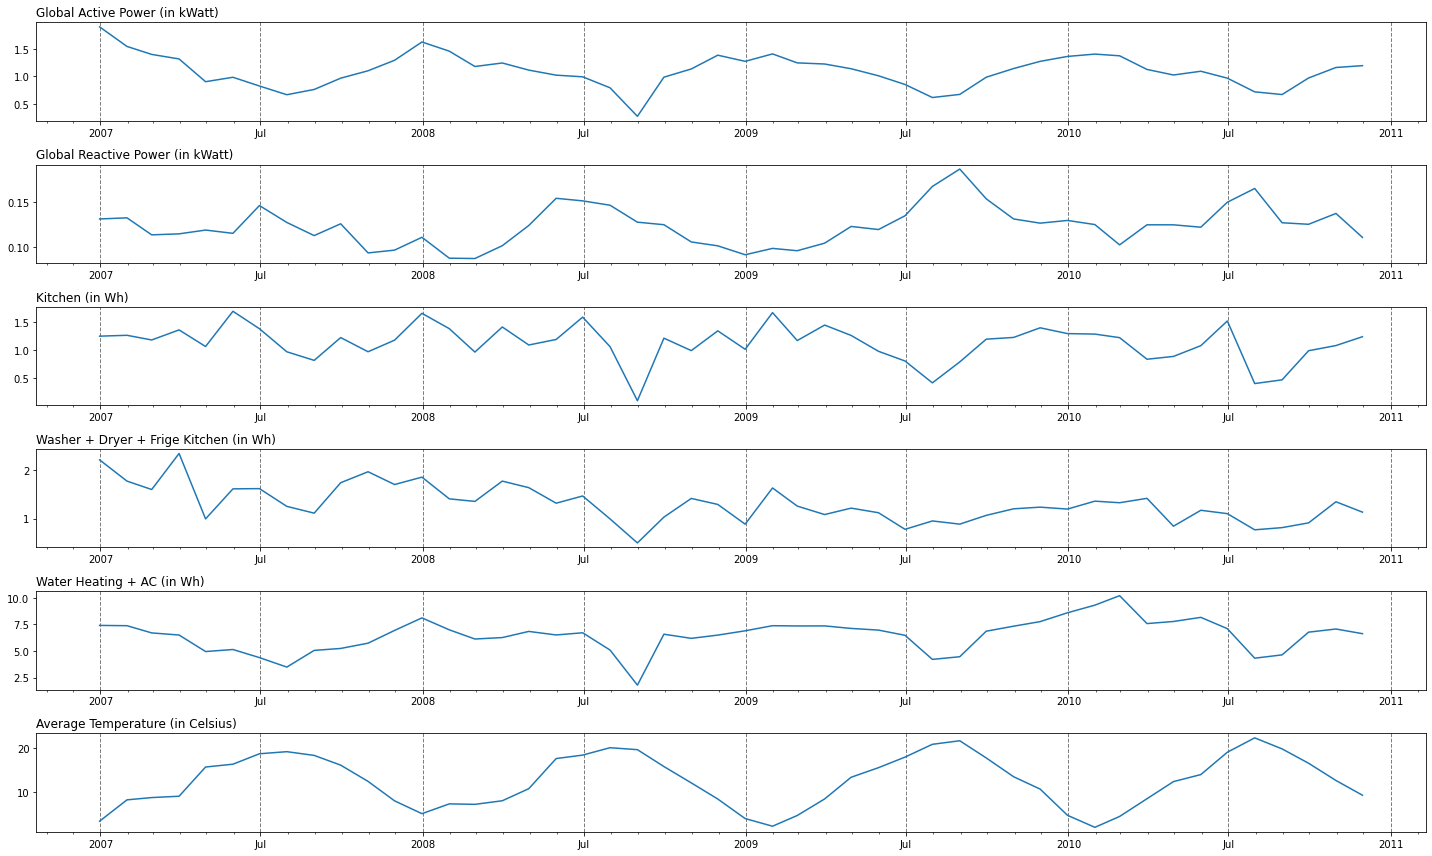

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,avg_t
DateTime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,4.9
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,4.9
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,4.9
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,4.9
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,4.9


In [15]:
data = df.copy()
data['Date'] = pd.to_datetime(data.index.date)
temperatures = pd.read_csv("pre_processing/temperatures.csv", parse_dates=['Date'], index_col='Date')
temperatures['avg_t'] = (temperatures['max_t'] + temperatures['min_t'])/2
data = data.join(temperatures, how="left", on='Date')
data = data.drop(columns=['Date','max_t','min_t'])

i = 1
data1 = data.drop(columns=['Global_intensity','Voltage'])
labels= ['Global Active Power (in kWatt)', 'Global Reactive Power (in kWatt)','Kitchen (in Wh)','Washer + Dryer + Frige Kitchen (in Wh) ','Water Heating + AC (in Wh)','Average Temperature (in Celsius)']
cols=[0, 1, 2, 3, 4, 5]
fig, axs = plt.subplots(6,1,figsize=(20, 12))
for col in cols:
    data_temp = data1.resample('m').mean()
    axs[col].plot(data_temp.index,data_temp.values[:, col])
    axs[col].set_title(labels[col], loc='left')
    axs[col].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    axs[col].xaxis.set_minor_locator(mdates.MonthLocator())
    axs[col].xaxis.set_major_formatter(mdates.ConciseDateFormatter(axs[col].xaxis.get_major_locator()))
    axs[col].xaxis.grid(color='black', linestyle='--', linewidth=1, alpha=0.5)
    
    i += 1
#for ax in fig.get_axes():
    #ax.label_outer()
plt.tight_layout()
plt.show()

data.head()

##### Scaled Global Active Power (kWatt) vs Scaled Average Temperature (Celsius) per month (in one plot, scaled)

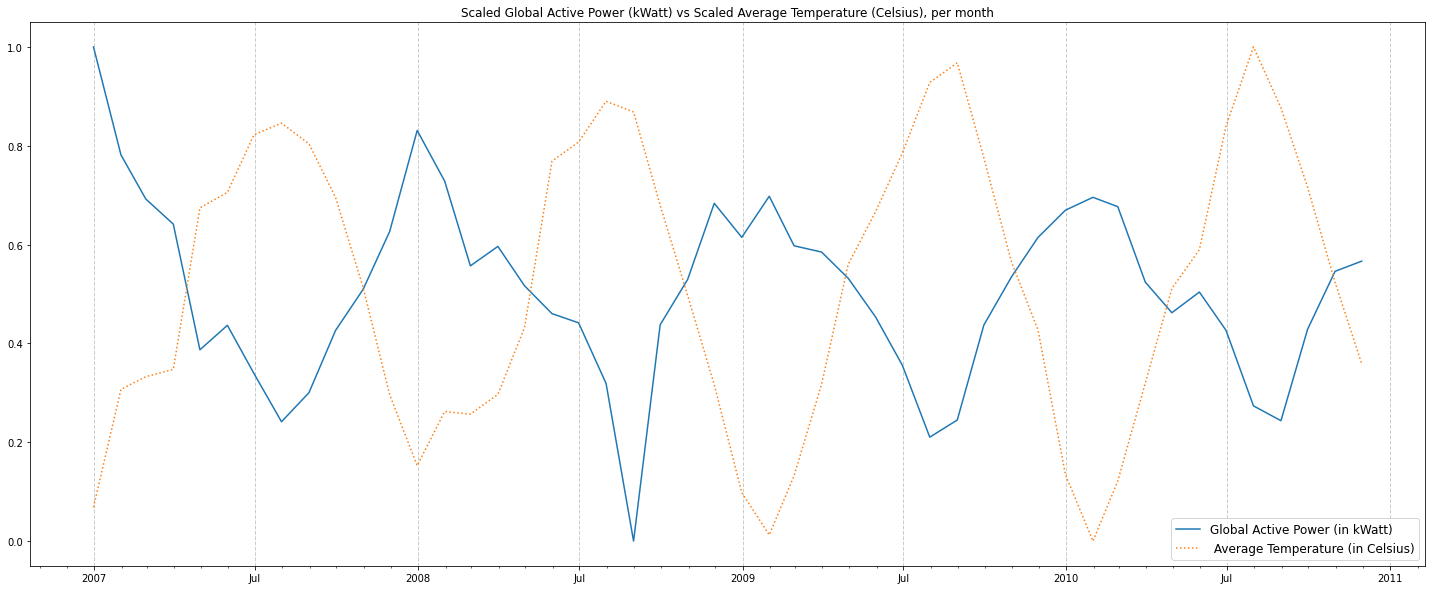

In [16]:
#plot global et sub sur meme plot, remettre a echelle

linestyle_str = ['solid','dotted','dashed','-.','-','--',':','dashdot']

data2 = data.resample('m').mean()
data2 = data2.drop(columns = ['Voltage','Sub_metering_1','Sub_metering_2','Sub_metering_3','Global_intensity','Global_reactive_power'])
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data2)
data2[data2.columns] = scaler.transform(data2[data2.columns])
fig, ax = plt.subplots(figsize=(25, 10))
cols=[0, 1]
for col in cols:
    ax.plot(data2.index,data2.values[:, col],linestyle=linestyle_str[col])
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
ax.xaxis.grid(color='black', linestyle='--', linewidth=1, alpha=0.2)
ax.legend(['Global Active Power (in kWatt)', ' Average Temperature (in Celsius)'],loc=4, bbox_to_anchor=(0.5, 0., 0.5, 0.5),fontsize="large")
ax.set_title('Scaled Global Active Power (kWatt) vs Scaled Average Temperature (Celsius), per month')
plt.show()

##### Scaled Water Heating + AC (Wh) vs Scaled Average Temperature (Celsius) per month (in one plot, scaled)

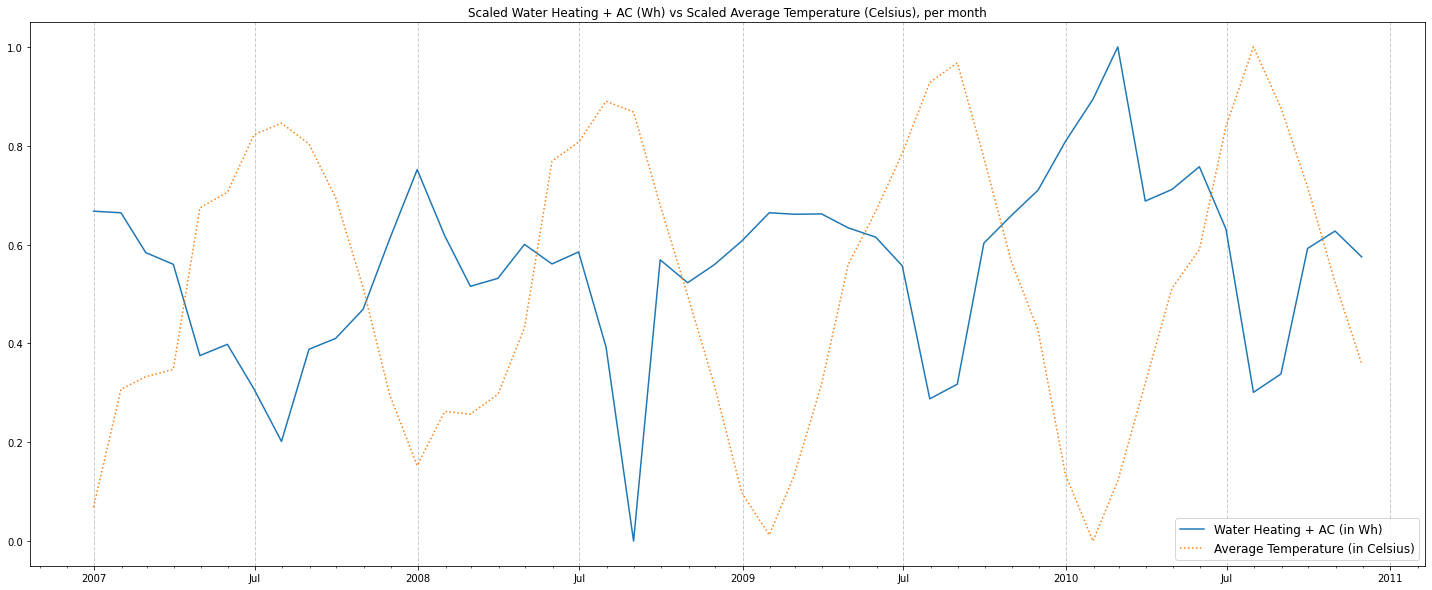

In [17]:
#plot global et sub sur meme plot, remettre a echelle

linestyle_str = ['solid','dotted','dashed','-.','-','--',':','dashdot']

data2 = data.resample('m').mean()
data2 = data2.drop(columns = ['Global_intensity', 'Global_reactive_power','Voltage','Global_active_power','Sub_metering_1','Sub_metering_2'])
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data2)
data2[data2.columns] = scaler.transform(data2[data2.columns])
fig, ax = plt.subplots(figsize=(25, 10))
cols=[0, 1]
for col in cols:
    ax.plot(data2.index,data2.values[:, col],linestyle=linestyle_str[col])
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
ax.xaxis.grid(color='black', linestyle='--', linewidth=1, alpha=0.2)
ax.legend(['Water Heating + AC (in Wh)', 'Average Temperature (in Celsius)'],loc=4, bbox_to_anchor=(0.5, 0., 0.5, 0.5),fontsize="large")
ax.set_title('Scaled Water Heating + AC (Wh) vs Scaled Average Temperature (Celsius), per month')
plt.show()

##### Scaled Global Active Power (kWatt) vs Water Heating + AC (Wh) per month (in one plot, scaled)

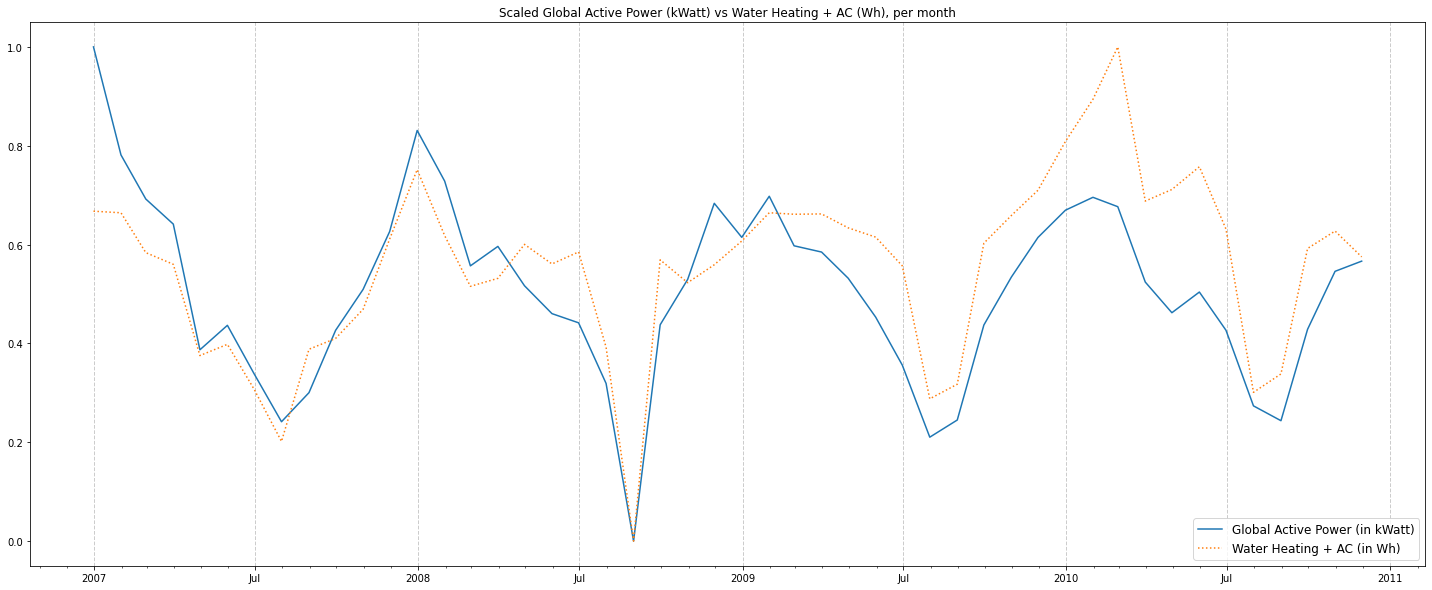

In [18]:
#plot global et sub sur meme plot, remettre a echelle

linestyle_str = ['solid','dotted','dashed','-.','-','--',':','dashdot']

data2 = data.resample('m').mean()
data2 = data2.drop(columns = ['Global_intensity', 'Global_reactive_power','Voltage','Sub_metering_1','Sub_metering_2','avg_t'])
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data2)
data2[data2.columns] = scaler.transform(data2[data2.columns])
fig, ax = plt.subplots(figsize=(25, 10))
cols=[0, 1]
for col in cols:
    ax.plot(data2.index,data2.values[:, col],linestyle=linestyle_str[col])
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
ax.xaxis.grid(color='black', linestyle='--', linewidth=1, alpha=0.2)
plt.legend(['Global Active Power (in kWatt)', 'Water Heating + AC (in Wh)'],loc=4, bbox_to_anchor=(0.5, 0., 0.5, 0.5),fontsize="large")
ax.set_title('Scaled Global Active Power (kWatt) vs Water Heating + AC (Wh), per month')
plt.show()

##### Correlation matrix of 5 variables of interest :

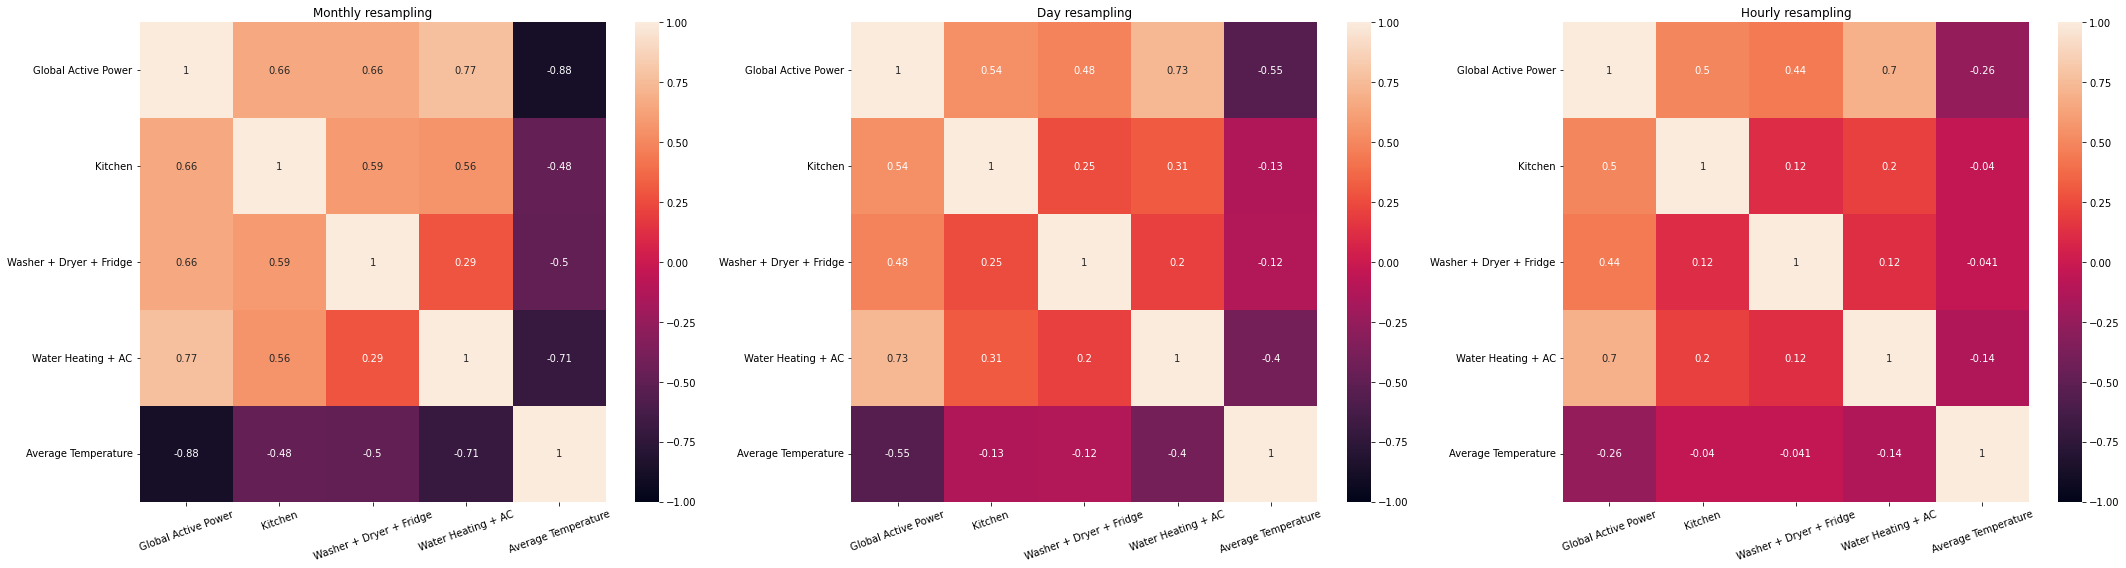

In [19]:
import seaborn as sns
fig,axs= plt.subplots(1,3,figsize=(30, 8))
data2 = data.copy()
data2 = data2.drop(columns=['Global_reactive_power','Voltage','Global_intensity'])
data2 = data2.rename({'Global_active_power': 'Global Active Power', 'Sub_metering_1': 'Kitchen', 'Sub_metering_2': 'Washer + Dryer + Fridge', 'Sub_metering_3': 'Water Heating + AC','avg_t':'Average Temperature'}, axis=1)
dfm = data2.resample('M').mean()
sns.heatmap(dfm.corr(), vmin=-1, vmax=1, annot=True, ax = axs[0])
axs[0].set_title('Monthly resampling', size=12)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=20)

dfd = data2.resample('D').mean()
sns.heatmap(dfd.corr(), vmin=-1, vmax=1, annot=True, ax = axs[1])
axs[1].set_title('Day resampling', size=12)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=20)
  
dfh = data2.resample('H').mean()
sns.heatmap(dfh.corr(), vmin=-1, vmax=1, annot=True, ax = axs[2])
axs[2].set_title('Hourly resampling', size=12)
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=20)

fig.tight_layout()
fig.show()

##### Distribution of all 8 variables :

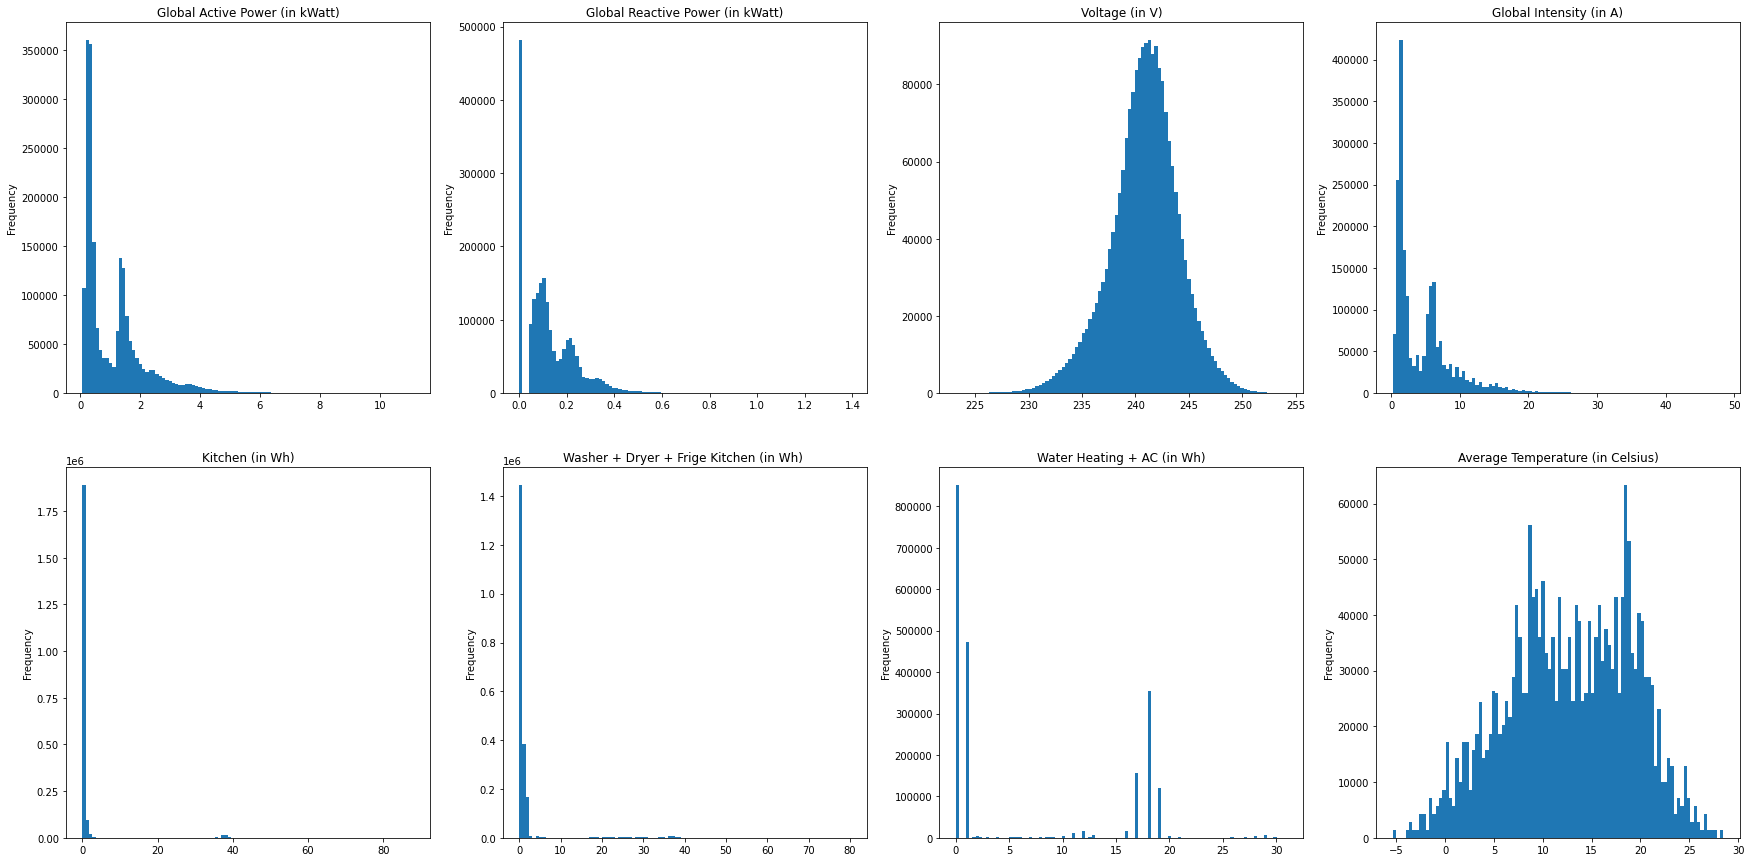

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30,15))
labels= ['Global Active Power (in kWatt)', 'Global Reactive Power (in kWatt)','Voltage (in V)','Global Intensity (in A)','Kitchen (in Wh)','Washer + Dryer + Frige Kitchen (in Wh) ','Water Heating + AC (in Wh)','Average Temperature (in Celsius)']
#fig.delaxes(axes[1,3])
for i in range(4):
    data[data.columns[i]].plot.hist(bins=100, alpha=1, ax=axes[0][i])
    axes[0][i].set_title(labels[i])
for i in range(4,8):
    data[data.columns[i]].plot.hist(bins=100, alpha=1, ax=axes[1][i-4])
    axes[1][i-4].set_title(labels[i])

### Visualization of Global_active_power

#### Moving average of the daily average global active power (in watt) per week

In [21]:
active_power_df = df[['Global_active_power']]
#active_power_df = active_power_df.loc[active_power_df.index.year == 2007]

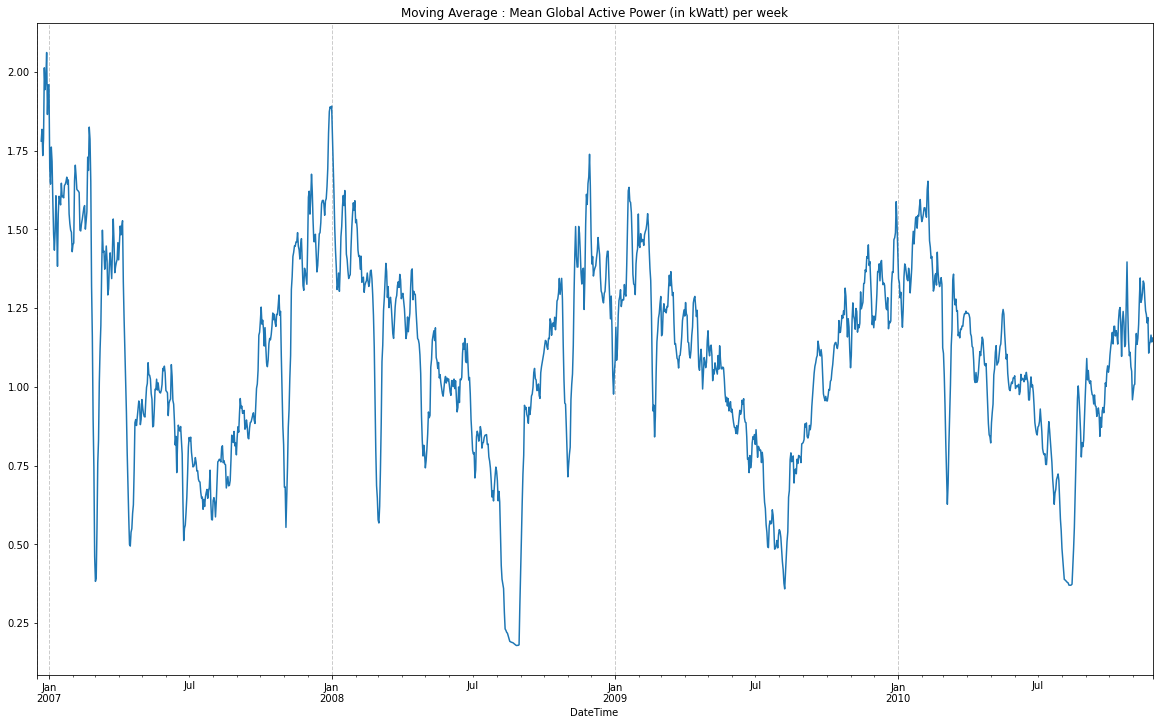

In [22]:
daily_avg = active_power_df.resample("D").mean()
fig, axs = plt.subplots(figsize=(20,12))
sma_length = 7
sma = daily_avg["Global_active_power"].rolling(window=sma_length).mean()
sma.plot(ax = axs)
axs.set_title("Moving Average : Mean Global Active Power (in kWatt) per week")
axs.xaxis.grid(color='black', linestyle='--', linewidth=1, alpha=0.2)
plt.show()
# sma

### Visualization of Global_active_power for "Time Series Analysis"

In [23]:
from scipy import stats
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import pacf, plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot

##### Lag plot (resampled per week)

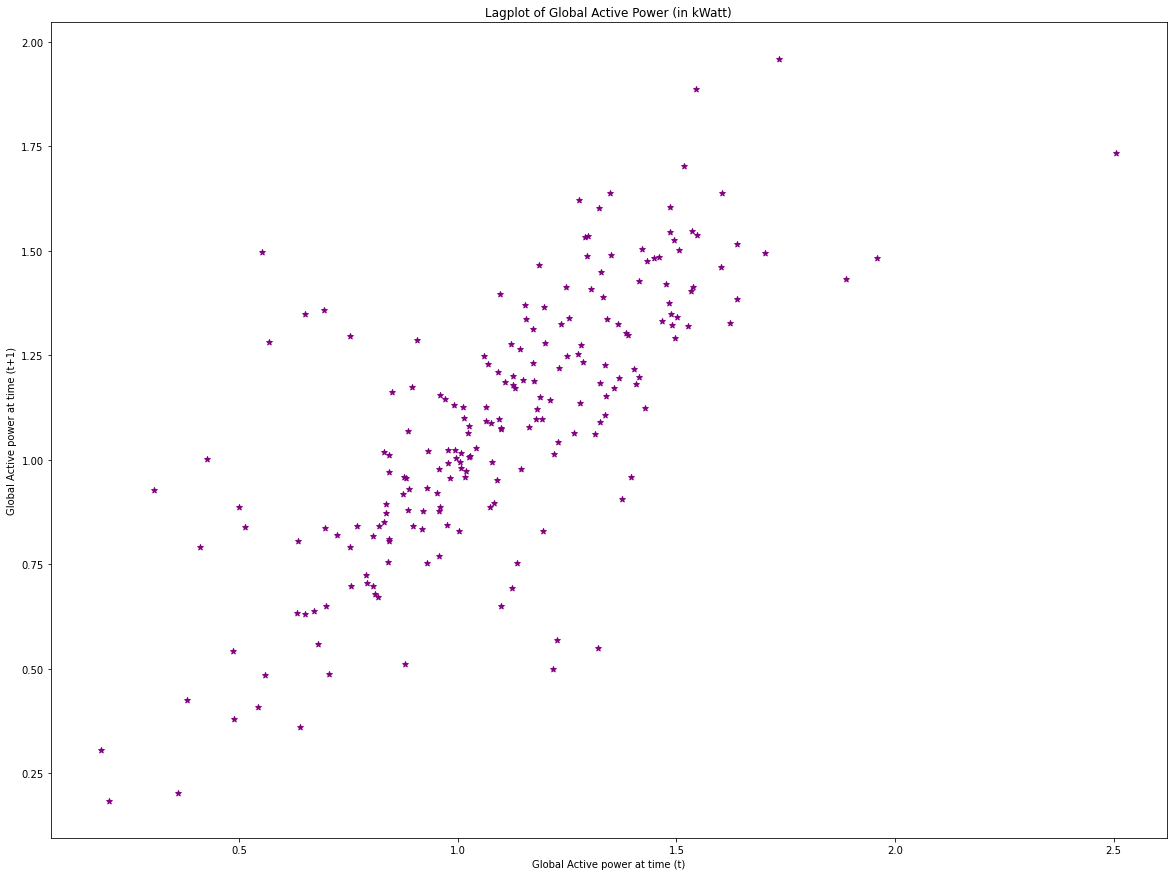

In [24]:
lagplot_data = df['Global_active_power'].resample('W').mean()
plt.figure(figsize = (20,15))
lagplot = lag_plot(lagplot_data, c = 'purple', marker = '*')
plt.xlabel('Global Active power at time (t)')
plt.ylabel('Global Active power at time (t+1)')
plt.title("Lagplot of Global Active Power (in kWatt)")
plt.show()

##### Correlation matrix of lagged variable

<AxesSubplot:>

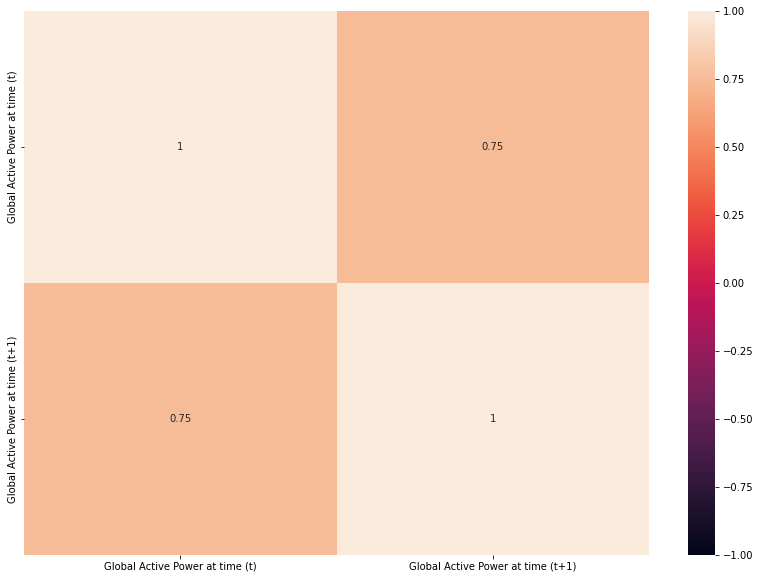

In [25]:
lagplot_data_df = pd.concat([lagplot_data.shift(-1), lagplot_data], axis = 1)
fig, axs = plt.subplots(1,1,figsize=(14,10))
lagplot_data_df.columns = ['Global Active Power at time (t)', 'Global Active Power at time (t+1)']
sns.heatmap(lagplot_data_df.corr(), vmin=-1, vmax=1, annot=True, ax = axs)

##### Autocorrelation plot 

In [26]:
df1 = df['Global_active_power'].resample('W').mean()
lagplot_data1 = df1.copy()

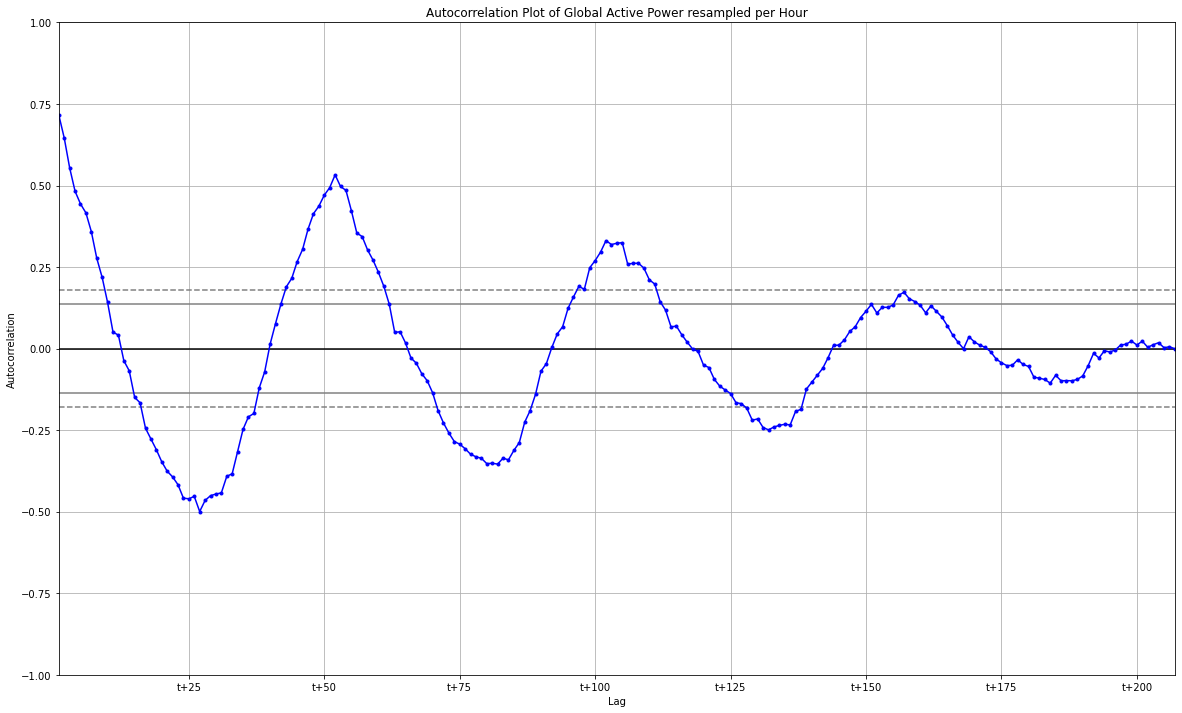

In [27]:
from matplotlib.ticker import FormatStrFormatter
plt.figure(figsize = (20,12))
lagplot1 = autocorrelation_plot(lagplot_data1, c = 'blue', marker = '.')
lagplot1.plot()
plt.title('Autocorrelation Plot of Global Active Power resampled per Hour')
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('t+%d'))
plt.show()

##### ACF and PACF plot 

/home/ubuntu/.local/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


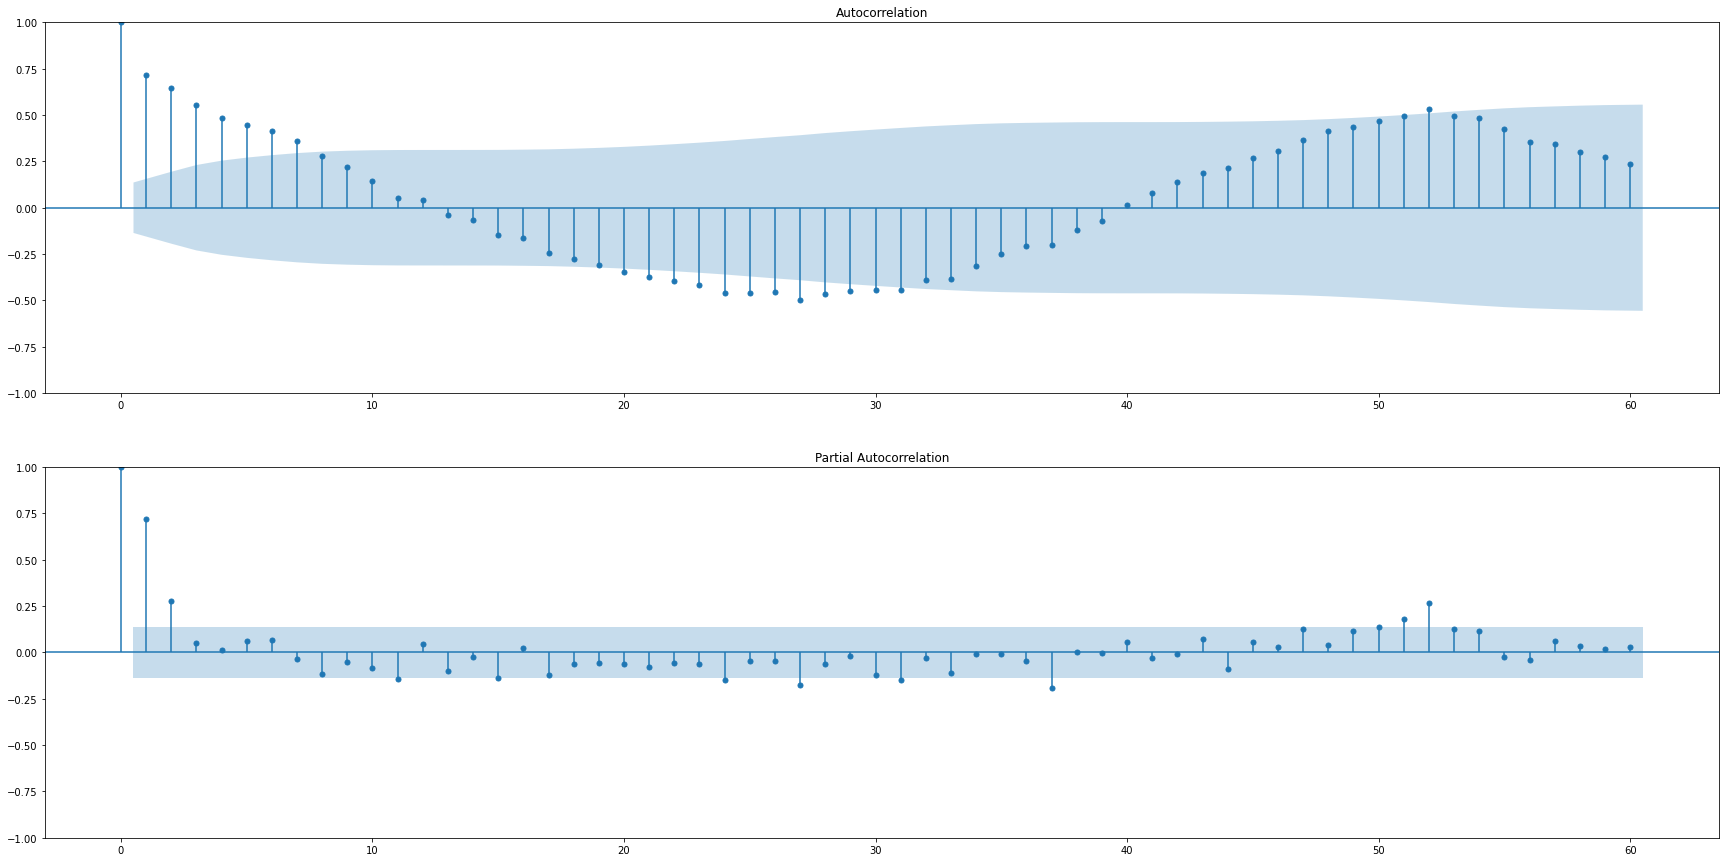

In [28]:
plt.figure(figsize = (30,15))
lags = 60
# acf
axis = plt.subplot(2, 1, 1)
plot_acf(df1, ax=axis, lags=lags)
# pacf
axis = plt.subplot(2, 1, 2)
plot_pacf(df1, ax=axis, lags=lags)
# show plot
plt.show()

##### Seasonality and Trend of the variable

<Figure size 2160x1080 with 0 Axes>

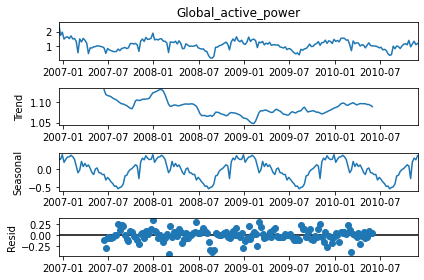

<Figure size 432x288 with 0 Axes>

In [29]:
from PIL import Image
plt.figure(figsize = (30,15))
data2 = df.copy()
data2 = data2.resample('W').mean()
data2.fillna(data2.mean(), inplace=True)
seasonal_decompose(data2["Global_active_power"]).plot()
plt.show()
plt.savefig('testplot.png')
Image.open('testplot.png').save('testplot.png','PNG')

## Visualization of variables composing Global_active_power : sub_meterings

### Sub metering 1 (kitchen) per hour of the day

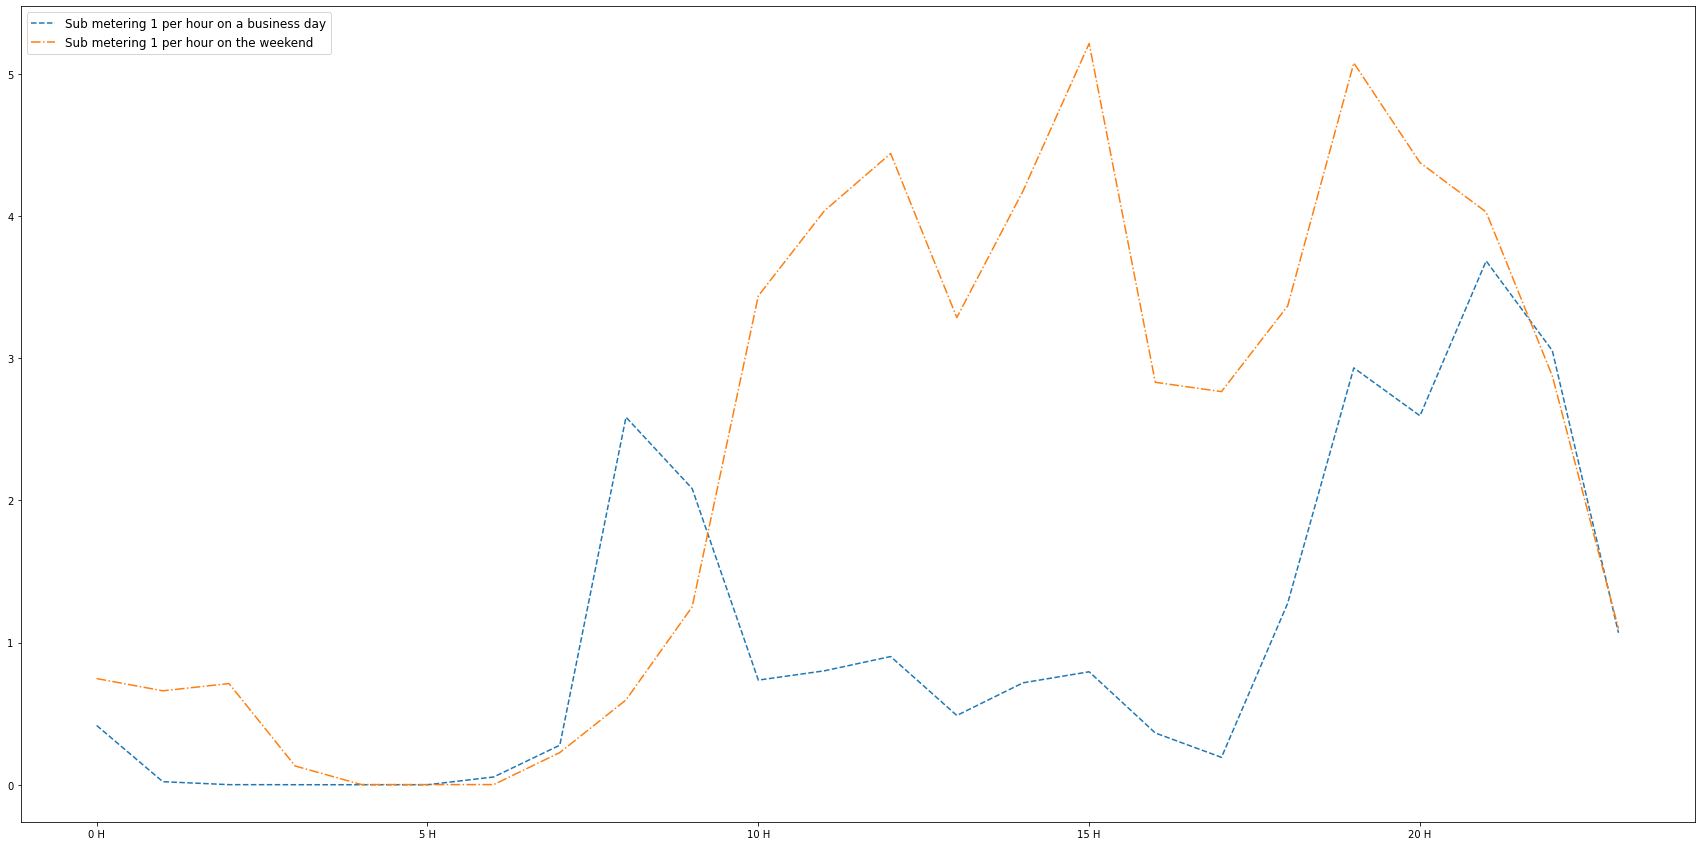

In [30]:
from vacances_scolaires_france import SchoolHolidayDates
import datetime
curves = ["Sub metering 1 per hour on a business day","Sub metering 1 per hour on the weekend"]
d = SchoolHolidayDates()
dict_holidays = d.holidays_for_year_and_zone(2007, 'C')
holidays = dict_holidays.keys()

plt.figure(figsize=(30, 15))

sub1_df = df[['Sub_metering_1']]
sub1_df = sub1_df.reset_index()

#sub1_df_all = sub1_df.loc[sub1_df["DateTime"].dt.year == 2007]
#sub1_df_all.set_index('DateTime', inplace=True)
#plt.plot(sub1_df_all.groupby(sub1_df_all.index.hour)["Sub_metering_1"].mean(),linestyle='-')

sub1_df_bd = sub1_df.loc[(sub1_df["DateTime"].dt.year == 2007) & (sub1_df["DateTime"].dt.weekday != 5) & (sub1_df["DateTime"].dt.weekday != 6) & (sub1_df["DateTime"].dt.date.isin(holidays)==False)]
sub1_df_bd.set_index('DateTime', inplace=True)
plt.plot(sub1_df_bd.groupby(sub1_df_bd.index.hour)["Sub_metering_1"].mean(),linestyle='--')

sub1_df_we = sub1_df.loc[(sub1_df["DateTime"].dt.year == 2007) & ((sub1_df["DateTime"].dt.weekday == 5) | (sub1_df["DateTime"].dt.weekday == 6)) & (sub1_df["DateTime"].dt.date.isin(holidays)==False)]
sub1_df_we.set_index('DateTime', inplace=True)
plt.plot(sub1_df_we.groupby(sub1_df_we.index.hour)["Sub_metering_1"].mean(),linestyle='-.')

#sub1_df_hd = sub1_df.loc[(sub1_df["DateTime"].dt.year == 2007) & (sub1_df["DateTime"].dt.date.isin(holidays))]
#sub1_df_hd.set_index('DateTime', inplace=True)
#plt.plot(sub1_df_hd.groupby(sub1_df_hd.index.hour)["Sub_metering_1"].mean(),linestyle=':')

plt.legend(curves,loc=2,fontsize="large")
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d H'))
plt.show()

# add curves

### Sub metering 2 : Washer + Dryer + Fridge, per hour of the day

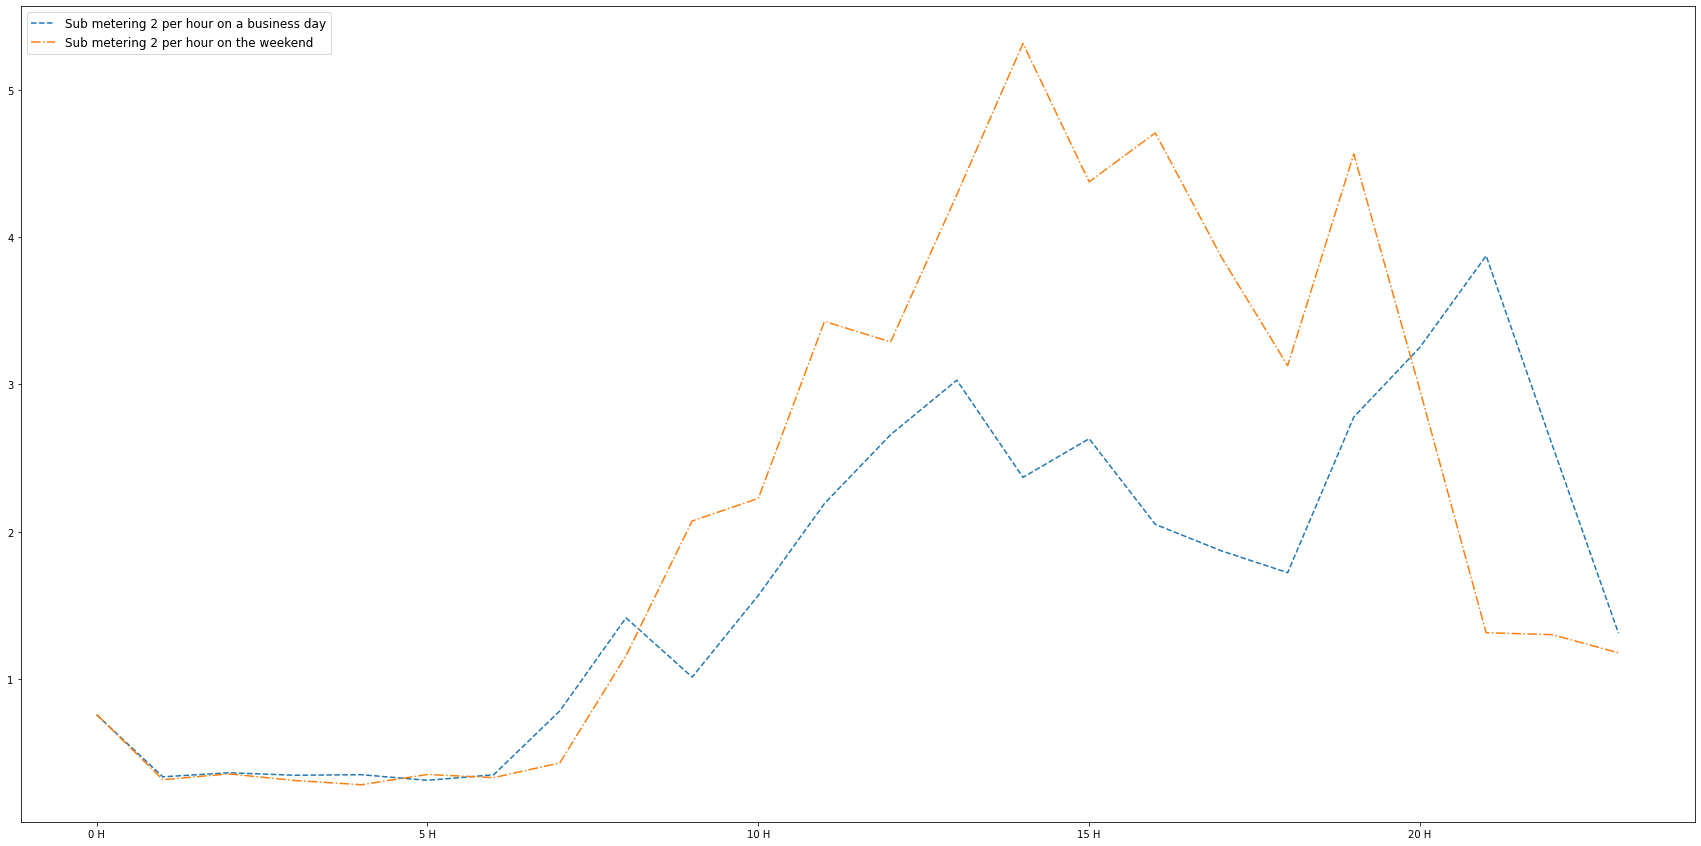

In [31]:
from vacances_scolaires_france import SchoolHolidayDates
import datetime
curves = ["Sub metering 2 per hour on a business day","Sub metering 2 per hour on the weekend"]
d = SchoolHolidayDates()
dict_holidays = d.holidays_for_year_and_zone(2007, 'C')
holidays = dict_holidays.keys()

plt.figure(figsize=(30, 15))

sub2_df = df[['Sub_metering_2']]
sub2_df = sub2_df.reset_index()

#sub2_df_all = sub2_df.loc[sub2_df["DateTime"].dt.year == 2007]
#sub2_df_all.set_index('DateTime', inplace=True)
#plt.plot(sub2_df_all.groupby(sub2_df_all.index.hour)["Sub_metering_2"].mean(),linestyle='-')

sub2_df_bd = sub2_df.loc[(sub2_df["DateTime"].dt.year == 2007) & (sub2_df["DateTime"].dt.weekday != 5) & (sub2_df["DateTime"].dt.weekday != 6) & (sub2_df["DateTime"].dt.date.isin(holidays)==False)]
sub2_df_bd.set_index('DateTime', inplace=True)
plt.plot(sub2_df_bd.groupby(sub2_df_bd.index.hour)["Sub_metering_2"].mean(),linestyle='--')

sub2_df_we = sub2_df.loc[(sub2_df["DateTime"].dt.year == 2007) & ((sub2_df["DateTime"].dt.weekday == 5) | (sub2_df["DateTime"].dt.weekday == 6)) & (sub2_df["DateTime"].dt.date.isin(holidays)==False)]
sub2_df_we.set_index('DateTime', inplace=True)
plt.plot(sub2_df_we.groupby(sub2_df_we.index.hour)["Sub_metering_2"].mean(),linestyle='-.')

#sub2_df_hd = sub2_df.loc[(sub2_df["DateTime"].dt.year == 2007) & (sub2_df["DateTime"].dt.date.isin(holidays))]
#sub2_df_hd.set_index('DateTime', inplace=True)
#plt.plot(sub2_df_hd.groupby(sub2_df_hd.index.hour)["Sub_metering_2"].mean(),linestyle=':')

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d H'))
plt.legend(curves,loc=2,fontsize="large")

plt.show()

# add curves

### Sub metering 3 : Water Heating and , per hour of the day

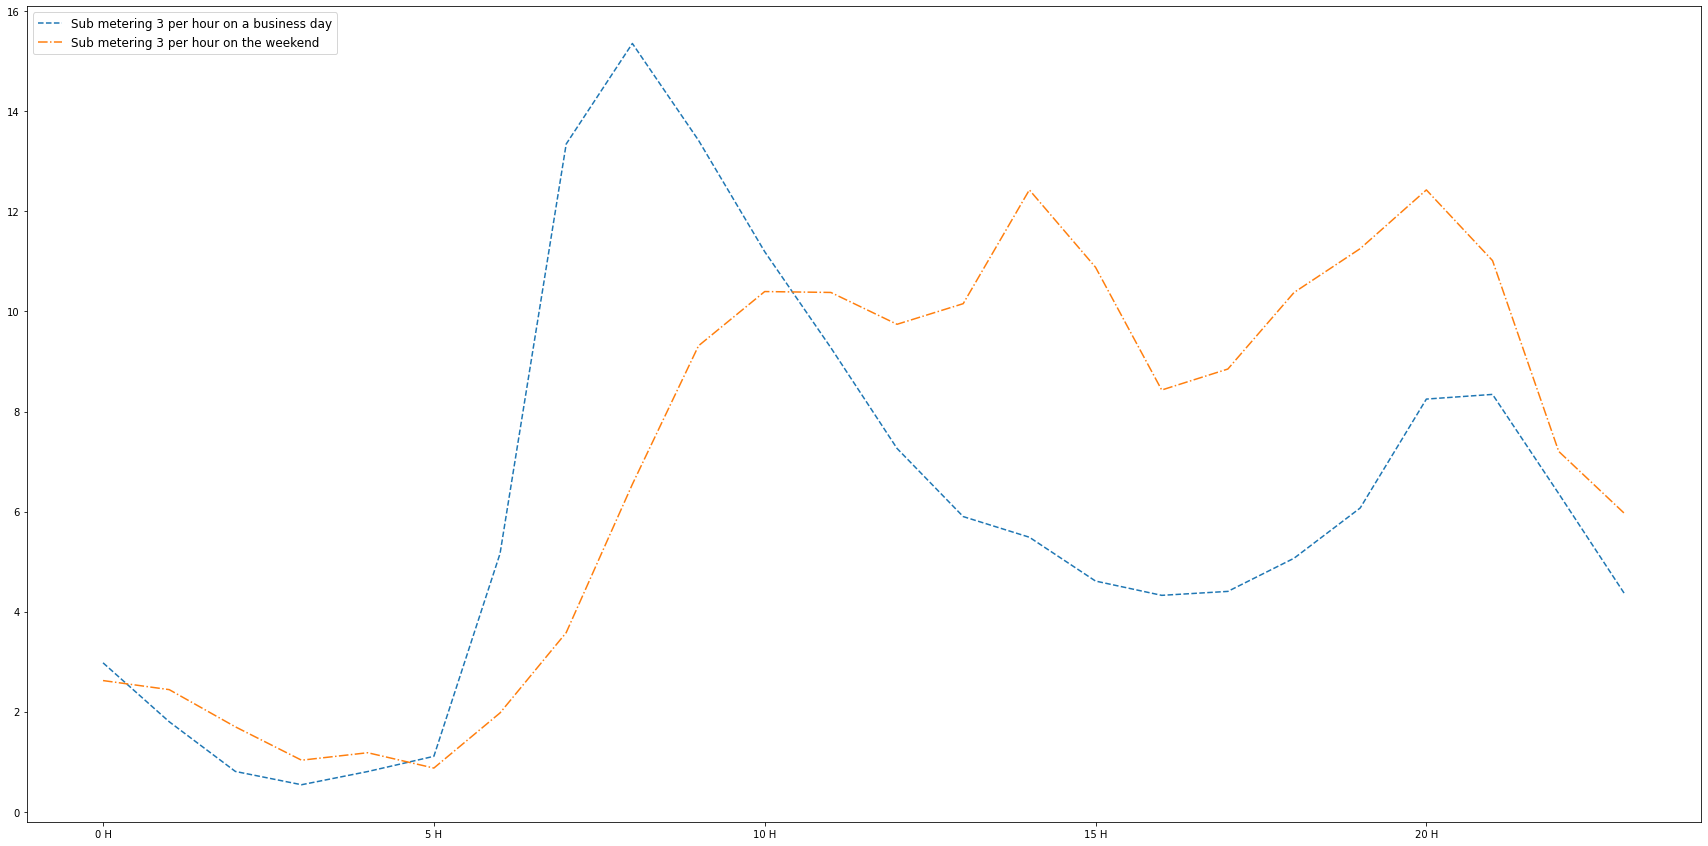

In [32]:
from vacances_scolaires_france import SchoolHolidayDates
import datetime
curves = ["Sub metering 3 per hour on a business day","Sub metering 3 per hour on the weekend"]
d = SchoolHolidayDates()
dict_holidays = d.holidays_for_year_and_zone(2007, 'C')
holidays = dict_holidays.keys()

plt.figure(figsize=(30, 15))

sub3_df = df[['Sub_metering_3']]
sub3_df = sub3_df.reset_index()

#sub3_df_all = sub3_df.loc[sub3_df["DateTime"].dt.year == 2007]
#sub3_df_all.set_index('DateTime', inplace=True)
#plt.plot(sub3_df_all.groupby(sub3_df_all.index.hour)["Sub_metering_3"].mean(),linestyle='-')

sub3_df_bd = sub3_df.loc[(sub3_df["DateTime"].dt.year == 2007) & (sub3_df["DateTime"].dt.weekday != 5) & (sub3_df["DateTime"].dt.weekday != 6) & (sub3_df["DateTime"].dt.date.isin(holidays)==False)]
sub3_df_bd.set_index('DateTime', inplace=True)
plt.plot(sub3_df_bd.groupby(sub3_df_bd.index.hour)["Sub_metering_3"].mean(),linestyle='--')

sub3_df_we = sub3_df.loc[(sub3_df["DateTime"].dt.year == 2007) & ((sub3_df["DateTime"].dt.weekday == 5) | (sub3_df["DateTime"].dt.weekday == 6)) & (sub3_df["DateTime"].dt.date.isin(holidays)==False)]
sub3_df_we.set_index('DateTime', inplace=True)
plt.plot(sub3_df_we.groupby(sub3_df_we.index.hour)["Sub_metering_3"].mean(),linestyle='-.')

#sub3_df_hd = sub3_df.loc[(sub3_df["DateTime"].dt.year == 2007) & (sub3_df["DateTime"].dt.date.isin(holidays))]
#sub3_df_hd.set_index('DateTime', inplace=True)
#plt.plot(sub3_df_hd.groupby(sub3_df_hd.index.hour)["Sub_metering_3"].mean(),linestyle=':')

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d H'))
plt.legend(curves,loc=2,fontsize="large")

plt.show()

# add curves

### Sub metering 1 : Kitchen, per minute between 6AM and 9AM

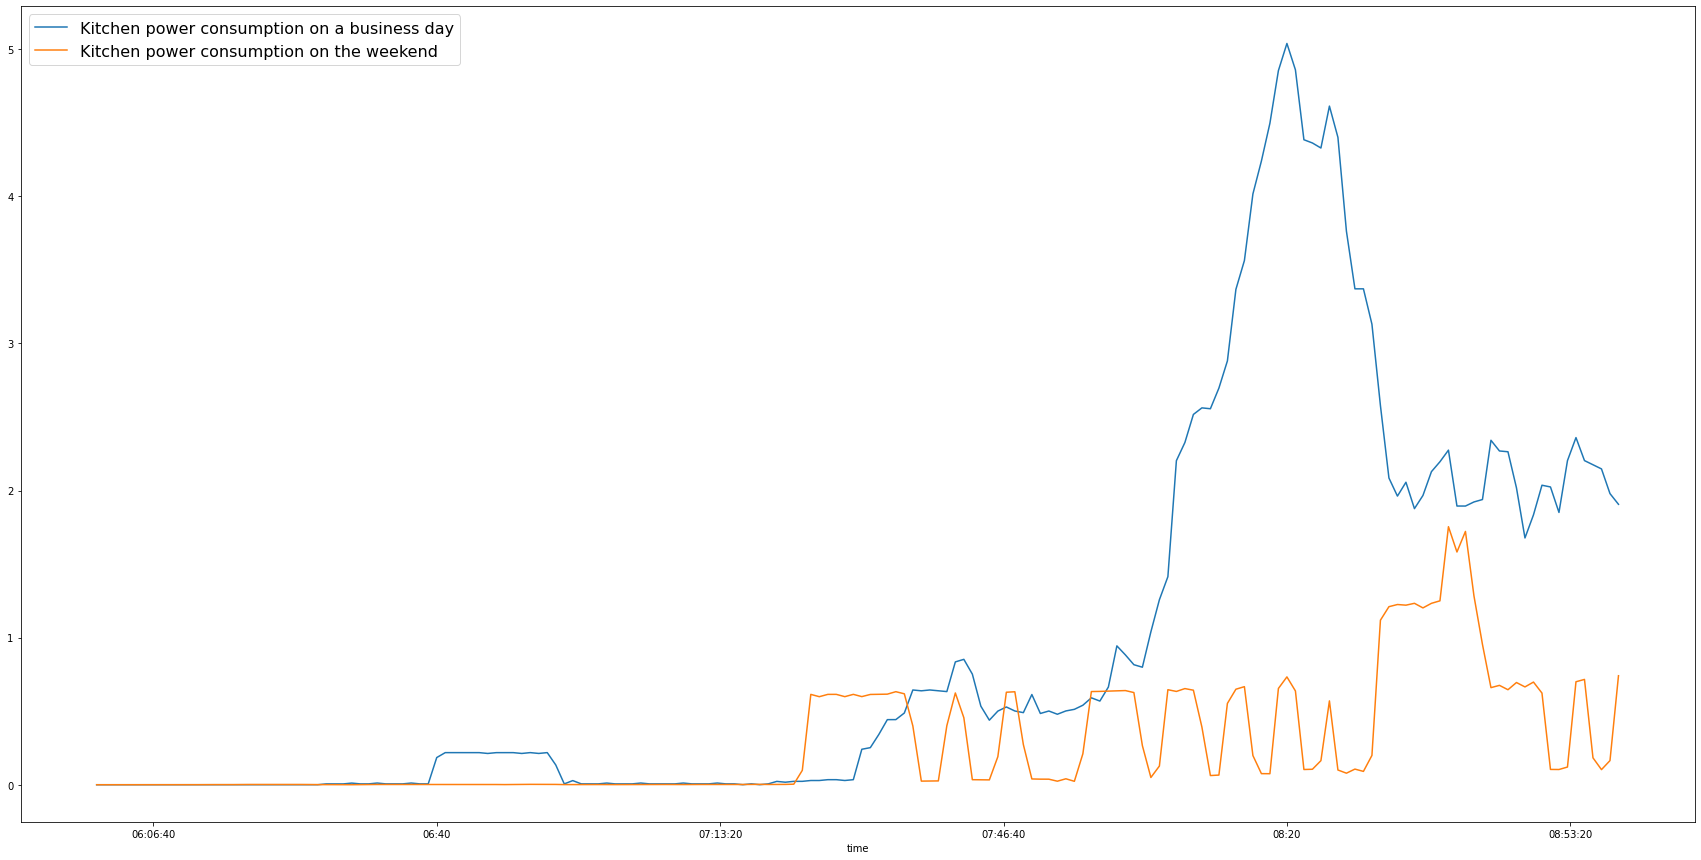

In [33]:
from vacances_scolaires_france import SchoolHolidayDates
import datetime
curves = ["Kitchen power consumption on a business day","Kitchen power consumption on the weekend"]
d = SchoolHolidayDates()
dict_holidays = d.holidays_for_year_and_zone(2007, 'C')
holidays = dict_holidays.keys()

plt.figure(figsize=(30, 15))

sub1_df = df[['Sub_metering_1']]
sub1_df = sub1_df.reset_index()

#sub1_df_all = sub1_df.loc[sub1_df["DateTime"].dt.year == 2007]
#sub1_df_all.set_index('DateTime', inplace=True)
#sub1_df_all = sub1_df_all.groupby([sub1_df_all.index.hour, sub1_df_all.index.minute]).mean()
#sub1_df_all.set_index(pd.date_range("00:00","23:59", freq="1min").time,inplace=True)
#plt.plot(sub1_df_all)

sub1_df_bd = sub1_df.loc[(sub1_df["DateTime"].dt.year == 2007) & (sub1_df["DateTime"].dt.weekday != 5) & (sub1_df["DateTime"].dt.weekday != 6) & (sub1_df["DateTime"].dt.date.isin(holidays)==False)]
sub1_df_bd.set_index('DateTime', inplace=True)
sub1_df_bd = sub1_df_bd.groupby([sub1_df_bd.index.hour, sub1_df_bd.index.minute]).mean()
sub1_df_bd.set_index(pd.date_range("00:00","23:59", freq="1min").time,inplace=True)
plt.plot(sub1_df_bd[360:540])

sub1_df_we = sub1_df.loc[(sub1_df["DateTime"].dt.year == 2007) & ((sub1_df["DateTime"].dt.weekday == 5) | (sub1_df["DateTime"].dt.weekday == 6)) & (sub1_df["DateTime"].dt.date.isin(holidays)==False)]
sub1_df_we.set_index('DateTime', inplace=True)
sub1_df_we = sub1_df_we.groupby([sub1_df_we.index.hour, sub1_df_we.index.minute]).mean()
sub1_df_we.set_index(pd.date_range("00:00","23:59", freq="1min").time,inplace=True)
plt.plot(sub1_df_we[360:540])

#sub1_df_hd = sub1_df.loc[(sub1_df["DateTime"].dt.year == 2007) & (sub1_df["DateTime"].dt.date.isin(holidays))]
#sub1_df_hd.set_index('DateTime', inplace=True)
#sub1_df_hd = sub1_df_hd.groupby([sub1_df_hd.index.hour, sub1_df_hd.index.minute]).mean()
#sub1_df_hd.set_index(pd.date_range("00:00","23:59", freq="1min").time,inplace=True)

plt.legend(curves,loc=2,fontsize=16)
#plt.plot(sub1_df_hd)


plt.show()

### Sub metering 2 : Washer + Dryer + Fridge, per minute between 6AM and 9AM

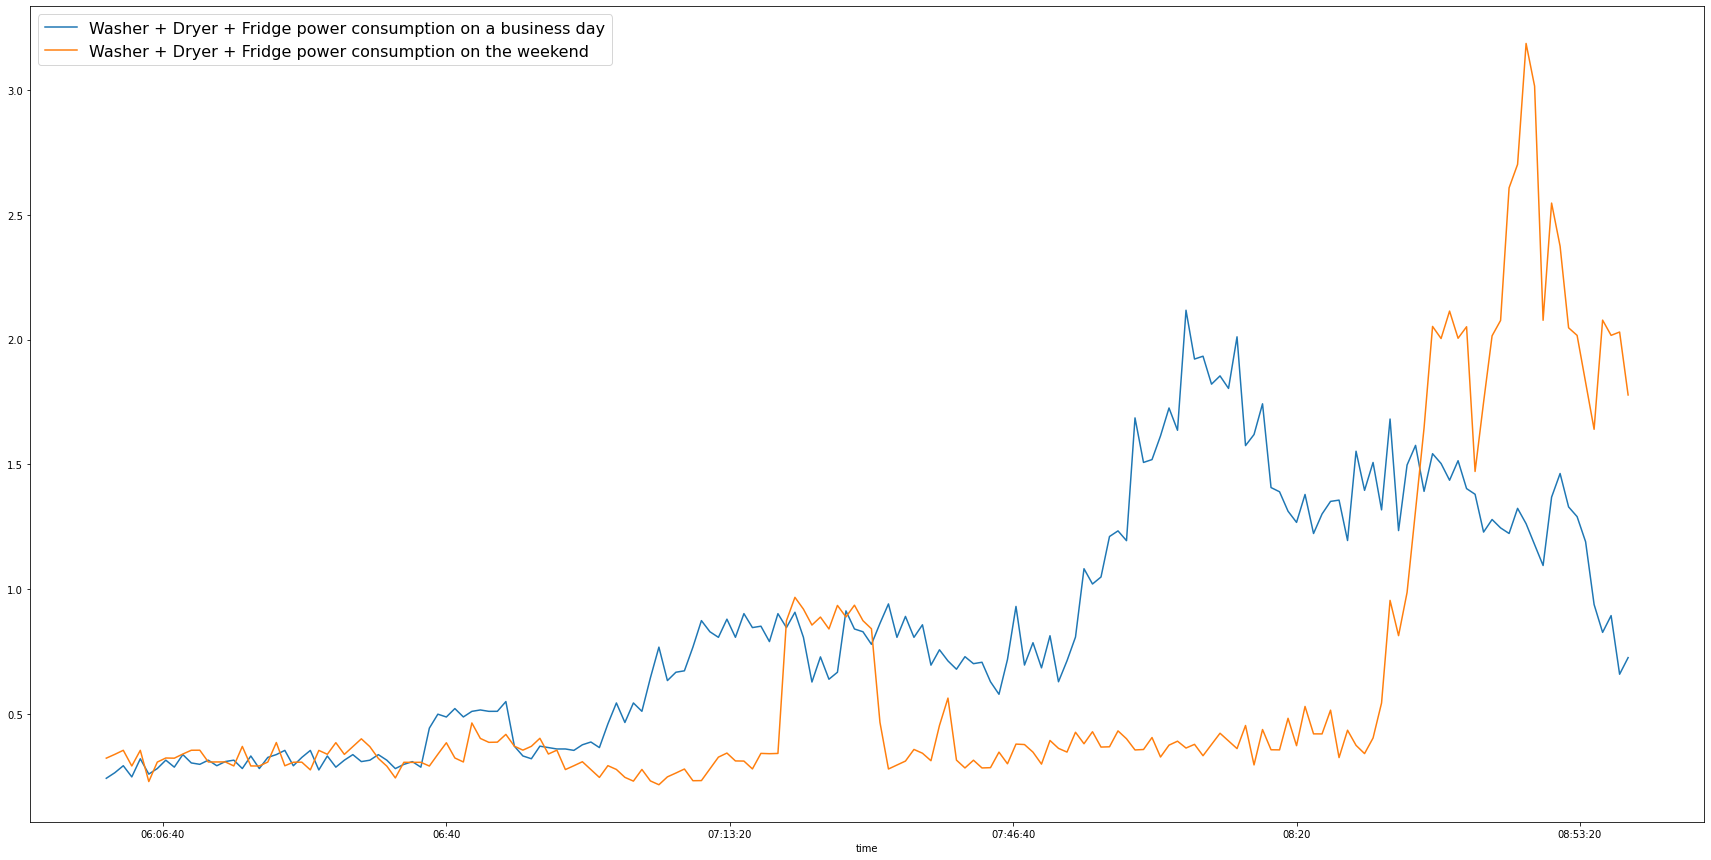

In [34]:
from vacances_scolaires_france import SchoolHolidayDates
import datetime
curves = ["Washer + Dryer + Fridge power consumption on a business day","Washer + Dryer + Fridge power consumption on the weekend"]
d = SchoolHolidayDates()
dict_holidays = d.holidays_for_year_and_zone(2007, 'C')
holidays = dict_holidays.keys()

plt.figure(figsize=(30, 15))

sub2_df = df[['Sub_metering_2']]
sub2_df = sub2_df.reset_index()

#sub2_df_all = sub2_df.loc[sub2_df["DateTime"].dt.year == 2007]
#sub2_df_all.set_index('DateTime', inplace=True)
#sub2_df_all = sub2_df_all.groupby([sub2_df_all.index.hour, sub2_df_all.index.minute]).mean()
#sub2_df_all.set_index(pd.date_range("00:00","23:59", freq="1min").time,inplace=True)
#plt.plot(sub2_df_all)

sub2_df_bd = sub2_df.loc[(sub2_df["DateTime"].dt.year == 2007) & (sub2_df["DateTime"].dt.weekday != 5) & (sub2_df["DateTime"].dt.weekday != 6) & (sub2_df["DateTime"].dt.date.isin(holidays)==False)]
sub2_df_bd.set_index('DateTime', inplace=True)
sub2_df_bd = sub2_df_bd.groupby([sub2_df_bd.index.hour, sub2_df_bd.index.minute]).mean()
sub2_df_bd.set_index(pd.date_range("00:00","23:59", freq="1min").time,inplace=True)
plt.plot(sub2_df_bd[360:540])

sub2_df_we = sub2_df.loc[(sub2_df["DateTime"].dt.year == 2007) & ((sub2_df["DateTime"].dt.weekday == 5) | (sub2_df["DateTime"].dt.weekday == 6)) & (sub2_df["DateTime"].dt.date.isin(holidays)==False)]
sub2_df_we.set_index('DateTime', inplace=True)
sub2_df_we = sub2_df_we.groupby([sub2_df_we.index.hour, sub2_df_we.index.minute]).mean()
sub2_df_we.set_index(pd.date_range("00:00","23:59", freq="1min").time,inplace=True)
plt.plot(sub2_df_we[360:540])

#sub2_df_hd = sub2_df.loc[(sub2_df["DateTime"].dt.year == 2007) & (sub2_df["DateTime"].dt.date.isin(holidays))]
#sub2_df_hd.set_index('DateTime', inplace=True)
#sub2_df_hd = sub2_df_hd.groupby([sub2_df_hd.index.hour, sub2_df_hd.index.minute]).mean()
#sub2_df_hd.set_index(pd.date_range("00:00","23:59", freq="1min").time,inplace=True)
#plt.plot(sub2_df_hd)

plt.legend(curves,loc=2,fontsize=16)


plt.show()

### Sub metering 3 : Water Heating + AC, per minute between 6AM and 9AM

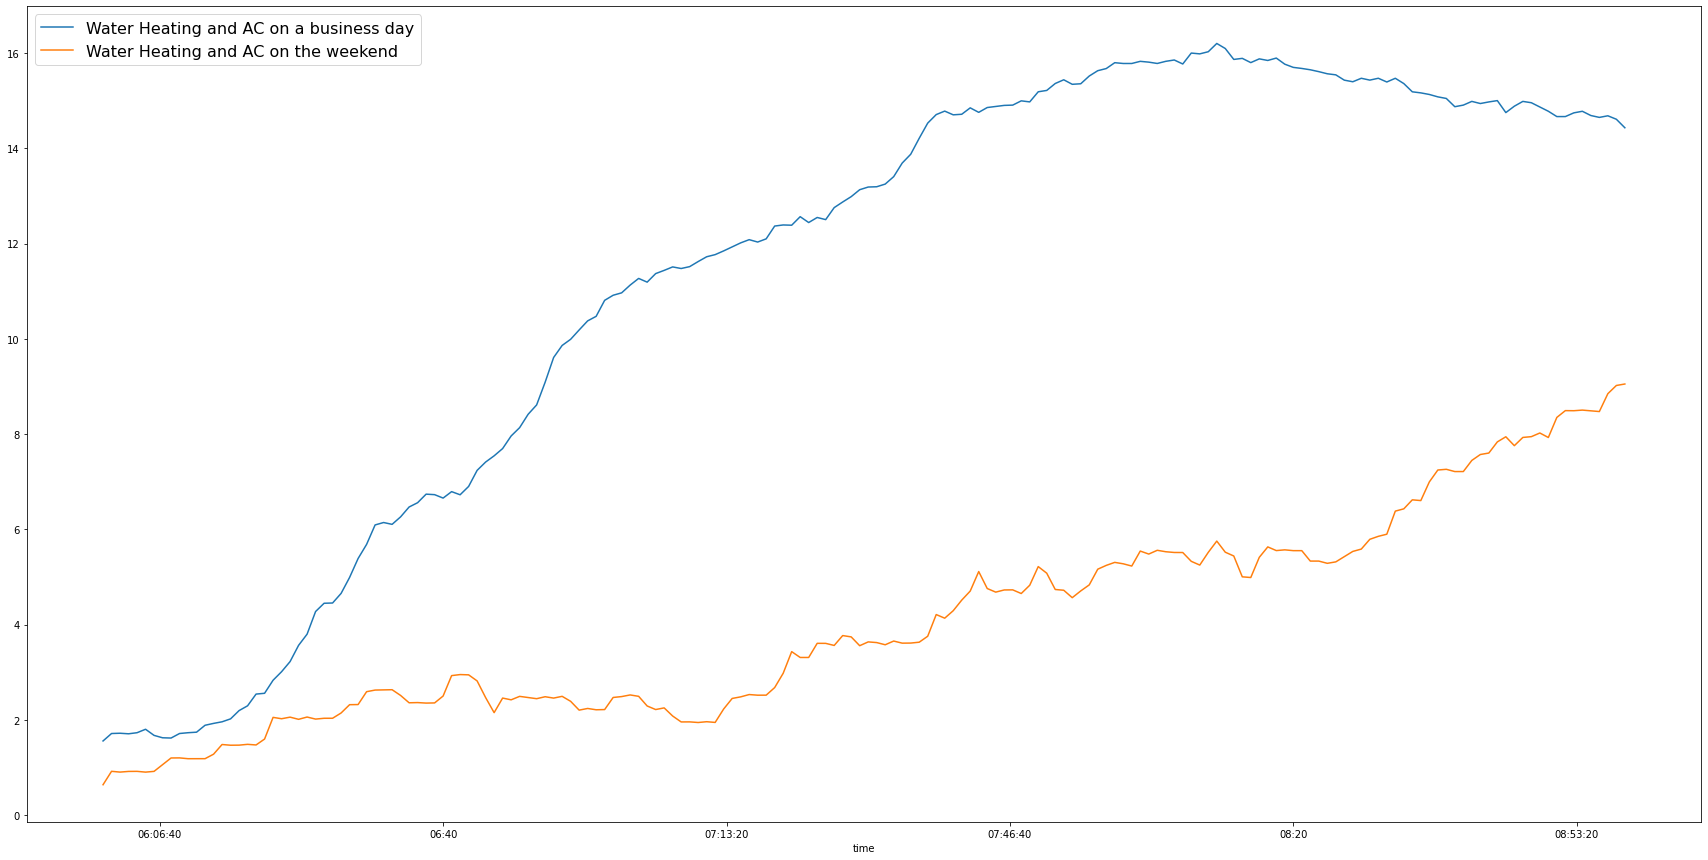

In [35]:
from vacances_scolaires_france import SchoolHolidayDates
import datetime
curves = ["Water Heating and AC on a business day","Water Heating and AC on the weekend"]
d = SchoolHolidayDates()
dict_holidays = d.holidays_for_year_and_zone(2007, 'C')
holidays = dict_holidays.keys()

plt.figure(figsize=(30, 15))

sub3_df = df[['Sub_metering_3']]
sub3_df = sub3_df.reset_index()

#sub3_df_all = sub3_df.loc[sub3_df["DateTime"].dt.year == 2007]
#sub3_df_all.set_index('DateTime', inplace=True)
#sub3_df_all = sub3_df_all.groupby([sub3_df_all.index.hour, sub3_df_all.index.minute]).mean()
#sub3_df_all.set_index(pd.date_range("00:00","23:59", freq="1min").time,inplace=True)
#plt.plot(sub3_df_all)

sub3_df_bd = sub3_df.loc[(sub3_df["DateTime"].dt.year == 2007) & (sub3_df["DateTime"].dt.weekday != 5) & (sub3_df["DateTime"].dt.weekday != 6) & (sub3_df["DateTime"].dt.date.isin(holidays)==False)]
sub3_df_bd.set_index('DateTime', inplace=True)
sub3_df_bd = sub3_df_bd.groupby([sub3_df_bd.index.hour, sub3_df_bd.index.minute]).mean()
sub3_df_bd.set_index(pd.date_range("00:00","23:59", freq="1min").time,inplace=True)
plt.plot(sub3_df_bd[360:540])

sub3_df_we = sub3_df.loc[(sub3_df["DateTime"].dt.year == 2007) & ((sub3_df["DateTime"].dt.weekday == 5) | (sub3_df["DateTime"].dt.weekday == 6)) & (sub3_df["DateTime"].dt.date.isin(holidays)==False)]
sub3_df_we.set_index('DateTime', inplace=True)
sub3_df_we = sub3_df_we.groupby([sub3_df_we.index.hour, sub3_df_we.index.minute]).mean()
sub3_df_we.set_index(pd.date_range("00:00","23:59", freq="1min").time,inplace=True)
plt.plot(sub3_df_we[360:540])

#sub3_df_hd = sub3_df.loc[(sub3_df["DateTime"].dt.year == 2007) & (sub3_df["DateTime"].dt.date.isin(holidays))]
#sub3_df_hd.set_index('DateTime', inplace=True)
#sub3_df_hd = sub3_df_hd.groupby([sub3_df_hd.index.hour, sub3_df_hd.index.minute]).mean()
#sub3_df_hd.set_index(pd.date_range("00:00","23:59", freq="1min").time,inplace=True)
#plt.plot(sub3_df_hd)

plt.legend(curves,loc=2,fontsize=16)

plt.show()

# add curves

#### All 7 original dataset variables, per hour of the day

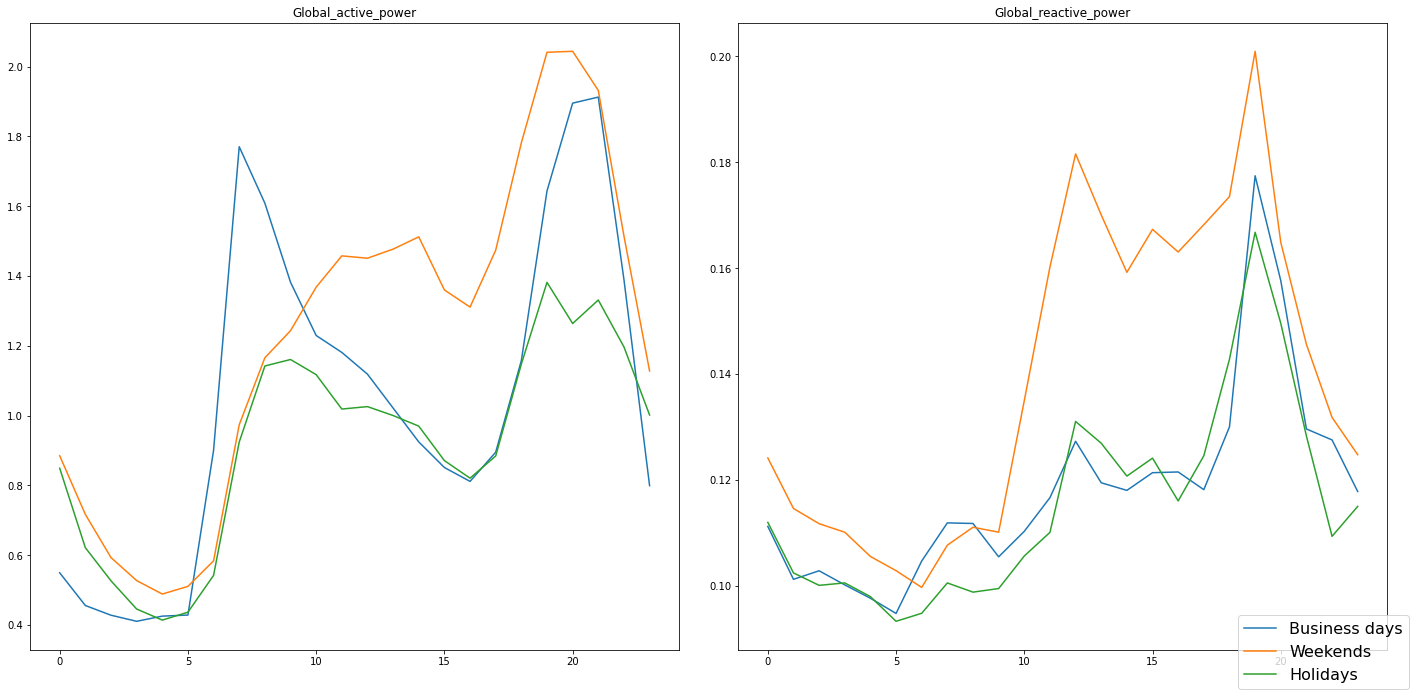

In [36]:
fig, axis = plt.subplots(1,2,figsize=(20, 10))
indexes = [0,1]
variables = list(df.columns)
#variables.remove('DateTime')
df_temp = df.reset_index()

data_bd = df_temp.loc[(df_temp["DateTime"].dt.weekday != 5) & (df_temp["DateTime"].dt.weekday !=6) & (df_temp["DateTime"].dt.date.isin(holidays)==False)]
data_we = df_temp.loc[(df_temp["DateTime"].dt.weekday == 5) | (df_temp["DateTime"].dt.weekday ==6)]
data_hd = df_temp.loc[(df_temp["DateTime"].dt.date.isin(holidays))]


for idx in (indexes):
    temp_bd=data_bd[['DateTime',variables[idx]]]
    temp_we=data_we[['DateTime',variables[idx]]]
    temp_hd=data_hd[['DateTime',variables[idx]]]
    axis[idx].plot(temp_bd.groupby(temp_bd['DateTime'].dt.hour)[variables[idx]].mean())
    axis[idx].plot(temp_we.groupby(temp_we['DateTime'].dt.hour)[variables[idx]].mean())
    axis[idx].plot(temp_hd.groupby(temp_hd['DateTime'].dt.hour)[variables[idx]].mean())
    axis[idx].set_title(variables[idx])
        
fig.tight_layout(pad=3.0)
fig.legend(['Business days', 'Weekends', 'Holidays'],loc=4, bbox_to_anchor=(0.5, 0., 0.5, 0.5),fontsize=16)
fig.show()